Il faut commencer par importer des bibliothèques (qui contiennent les fonctions utiles, comme les fonctions pour générer un nombre pris uniforomément dans $[0,1]$, pour tracer des graphes, etc.)

In [1]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

## La fonction random

La fonction "random( )" (de la bibliothèque numpy.random) génère un nombre *pseudo-aléatoire*, qui ressemble beaucoup à un nombre pris dans l'intervalle $[0,1]$ de manière aléatoire. Des appels succesifs à cette fonction sont des tirages *indépendants* de nombres pris dans l'intervalle $[0,1]$ de manière aléatoire.

On dit que la fonction random( ) *génère* des variables aléatoires de loi $\mathcal{U}(0,1)$.

Le programme suivant imprime 10 appels à la fonction random( ). Vous pouvez l'exécuter plusieurs fois pour voir que les nombres renvoyés sont différents.

In [2]:
for i in range(10):
    print(rd.random())

0.7885523085127445
0.2389233961762086
0.4346364196380408
0.6553252983222685
0.461555932553837
0.6519329691412274
0.617558554496986
0.5075912630037495
0.8646036238016096
0.7212590274371726


On peut dessiner un histogramme des résultats de 100 appels à la fonction random( ). La hauteur des barres correspond au nombre de fois que la fonction random( ) renvoie un nombre dans l'intervalle donné par la barre.

Vous pouvez exécuter le programme suivant plusieurs fois: vous obtiendrez des histogrammes différents, car les 100 appels à la fonction random( ) donnent des résultats aléatoires (il y a de grandes chances que les 100 appels suivants donneront des résultats différents).

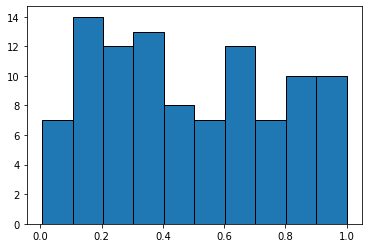

In [3]:
plt.hist([rd.random() for i in range(100)],bins=10,edgecolor='black')
plt.show()

Passons à 1000 appels à la fonction random( ), toujours représentés sous la forme d'un histogramme.

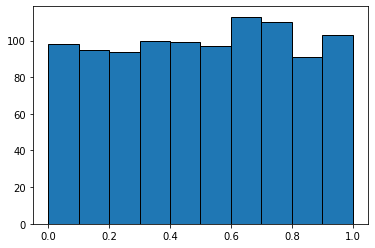

In [4]:
plt.hist([rd.random() for i in range(1000)],bins=10,edgecolor='black')
plt.show()

Et pour 10000 appels...

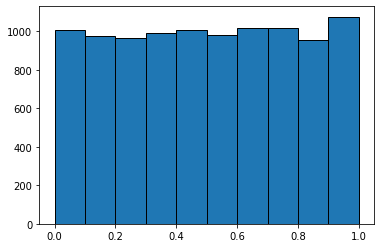

In [5]:
plt.hist([rd.random() for i in range(10000)],bins=10,edgecolor='black')
plt.show()

On voir apparaître la forme de la densité de la loi uniforme! C'est normal, s'il y a a beaucoup d'appels à la fonction random( ), la proportion de fois où la valeur renvoyée tombera dans un intervalle $[a,b]$ sera proche de la probabilité $P(X\in [a,b])$. Il s'agit de la loi des grands nombres.

## Des fonctions simples de la fonction random

On va maintenant utiliser la fonction random( ) pour créer des variables aléatoires plus générales.

### La différence entre random( )$^2$ et random( )$\times$random( )

Il y a une différence entre appeler la fonction random( ) et la mettre au carré
et appeler deux fois la fonction random( ) et faire le produit! En effet, dans le premier cas, on obtient $X^2$
où $X\sim \mathcal{U}(0,1)$
et dans le deuxième cas on obtient $X\times Y$
où $X\sim \mathcal{U}(0,1)$, $Y\sim \mathcal{U}(0,1)$ sont indépendantes. Il s'agit de deux variables aléatoires qui n'ont pas la même loi!

#### Exercice: 
1. Soit $X$ une variable aléatoire de loi $\mathcal{U}(0,1)$. Montrer que $X^2$ admet pour densité $\frac{1}{2\sqrt{x}} \mathbf{1}_{]0,1[}(x)$.
2. Soient $X$ et $Y$ deux variables aléatoires indépendantes, toutes les deux de loi $\mathcal{U}(0,1)$. Montrer que $Z= X Y$ admet pour densité $(-\ln z) \mathbf{1}_{]0,1[}(z)$.

Traçons un histogramme de 10000 appels à la fonction random( )$^2$, et comparons-le à la densité trouvée dans l'exercice ci-dessus pour $X^2$.

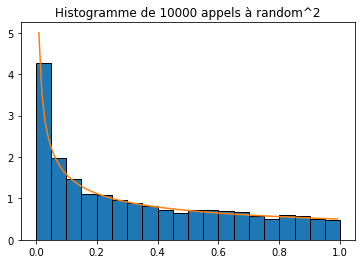

In [6]:
plt.title('Histogramme de 10000 appels à random^2')
plt.hist([rd.random()**2 for i in range(10000)],bins=20,edgecolor='black',density=True)
plt.plot([i*0.01 for i in range(1,100)],[0.5/sqrt(i*0.01) for i in range(1,100)])
plt.show()

Traçons un histogramme de 10000 appels à la fonction random( )$\times$random( ), et comparons-le à la densité trouvée dans l'exercice ci-dessus pour $Z=X Y$.

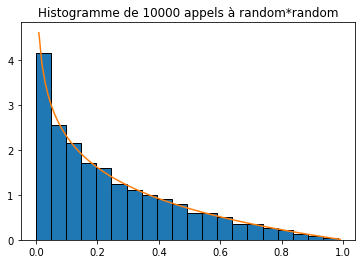

In [7]:
plt.title('Histogramme de 10000 appels à random*random')
plt.hist([rd.random()*rd.random() for i in range(10000)],bins=20,edgecolor='black',density=True)
plt.plot([i*0.01 for i in range(1,100)],[-log(i*0.01) for i in range(1,100)])
plt.show()

### Obtenir une variable aléatoire de Bernoulli, une binomiale...

#### Variable aléatoire de Bernoulli
On peut aussi utiliser la fonction random( ) pour générer une variable aléatoire de Bernoulli de paramètre $p$. Il suffit de créer une épreuve dont la probabilitee de succès vaut $p$. L'épreuve est la suivante: si random( )$<p$, alors c'est un succès; si random( )$\geq p$, alors c'est un échec.

In [8]:
def Bernoulli(p):
    if rd.random()<p:
        return 1
    else:
        return 0

Voyons ce que donne 200 appels successifs à la fonction Bernoulli($p$). Vous pouvez changer la valeur de $p$ dans la première ligne. On obtient une suite de 0 et de 1 aléatoire.

In [9]:
p=0.3
for i in range(200):
    print(Bernoulli(p), end =" ")

1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 

#### Variable aléatoire binomiale
Pour générer une variable aléatoire binomiale de paramètres $n,p$, il suffit d'utiliser la fonction Bernoulli que l'on vient de créer: pour rappel, une  variable aléatoire binomiale de paramètres $n,p$ est une somme de $n$ variables aléatoires de Bernoulli de paramètre $p$ indépendantes.

In [10]:
def Binomiale(n,p):
    x=0
    for i in range(n):
        x=x+Bernoulli(p)
    return x

Voyons ce que donne 200 appels successifs à la fonction Binomiale($n,p$). Vous pouvez changer les valeurs de $n$ et $p$ dans la première ligne. On obtient une suite de 0 et de 1 aléatoire.

In [11]:
n=20
p=0.4
for i in range(200):
    print(Binomiale(n,p), end =" ")

11 7 10 9 7 4 8 4 8 7 9 8 12 4 7 7 9 8 7 10 8 12 8 6 7 11 8 9 6 5 8 11 10 10 11 16 7 9 10 10 8 9 9 9 10 9 6 10 8 6 8 7 10 9 6 8 7 8 5 3 5 10 6 8 5 10 7 10 6 10 9 8 6 8 7 11 8 13 9 4 4 8 7 7 2 9 9 7 5 8 6 9 6 13 9 6 10 7 10 5 6 9 7 8 10 9 10 6 9 7 9 10 7 8 5 9 10 6 10 12 6 8 7 8 8 6 4 8 8 9 10 6 11 7 5 9 11 8 8 9 9 6 7 9 8 9 6 8 7 8 3 10 7 8 7 12 6 10 9 11 11 8 6 6 10 8 8 8 10 10 8 8 6 7 4 8 8 9 7 8 7 6 8 11 8 8 6 9 11 7 8 12 11 6 7 7 5 9 7 6 

#### Exercice: Variable aléatoire géométrique
Compléter le programme suivant, qui permet de générer une variable aléatoire géométrique: pour rappel, 
une variable aléatoire géométrique de paramètre $p$ est l'instant de premier succès parmi des épreuves indépendantes de probabilité de succès $p$.

In [12]:
def Geom(p):
    x=1
    while Bernoulli(p)==0:  ### Bernoulli(p)==0 correspond à un échec lors de l'épreuve
        ??
    return x

In [13]:
p=0.5
for i in range(200):
    print(Geom(p), end =" ")

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

### Quelques variables aléatoires à densité: exponentielle et loi normale

#### Variable aléatoire exponentielle

Exercice: montrer que si $X\sim \mathcal{U}(0,1)$, alors $- \frac{1}{a}\ln X$ suit une loi exponentielle de paramètre $a$. 

On peut utiliser ce fait pour générer une variable aléatoire exponentielle de paramètre $a$.

In [14]:
def Expo(a):
    return -log(rd.random())/a

Imprimons $50$ appels à la fonction Expo(a). Vous pouvez modifier la valeur de $a$ pour voir l'effet que cela a sur la suite (aléatoire) de nombre renvoyés.

In [15]:
a=0.5
for i in range(50):
    print(Expo(a), end=" ")

0.46226854479841517 3.5703559277709793 0.008893938255642046 0.07390587794632676 3.6692817573389775 1.7638647157594673 1.4721825396690578 0.6857697203671755 0.5235565160084555 0.28115163277304084 0.630204682252933 0.05226146133481815 5.062819641032205 3.0245748628865843 4.820369990633732 2.580989907455623 2.721838821594953 6.921880825419322 0.9720955074696924 0.26177802911362125 2.6021925836013624 0.22289802545834259 8.587973936109735 4.975915906770565 0.1283688420443145 0.3731832520944285 4.340469113377698 1.3674647168479646 0.6871910525875512 0.9671837807589271 1.2877006644776066 4.182004336488164 1.4766011522961395 0.25916710276253435 4.957816530921072 1.352149529357208 0.28074013012965426 1.6586340718571566 8.75166857050309 0.7210701788121311 0.11447430256270538 0.12185383441512572 2.5252773037713028 0.2362284721889002 0.36238434644073186 0.02232819017878788 0.012973566407349757 0.5062341204447646 0.8028896187870233 0.2836458120863107 

Traçons maintenant un histogramme de $k=10000$ appels à la fonction Expo(a), et comparons-le à la densité de la loi exponentielle.

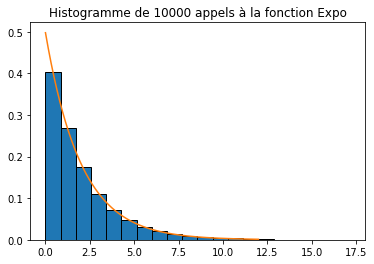

In [16]:
a=0.5
k=10000
plt.title('Histogramme de {} appels à la fonction Expo'.format(k))
plt.hist([Expo(a) for i in range(k)],bins=20,edgecolor='black',density=True)
plt.plot([i*0.01 for i in range(1,int(600/a))],[a*exp(-a*i*0.01) for i in range(1,int(600/a))])
plt.show()

#### Variable aléatoire normale

Exercice (difficile): Montrer que si $U\sim \mathcal{U}(0,1)$ et $V\sim \mathcal{U}(0,1)$ sont indépendantes, 
alors $Z:= \sqrt{- 2\ln U} \times \sin (2\pi V)$ suit une loi $\mathcal{N}(0,1)$.

On peut utiliser ce fait pour générer une variable aléatoire de loi normale.

In [17]:
def Normale():
    return sqrt(-2*log(rd.random()))*sin(2*pi*rd.random())

Traçons maintenant un histogramme de $k=10000$ appels à la fonction Normale(), et comparons-le à la densité de la loi normale.

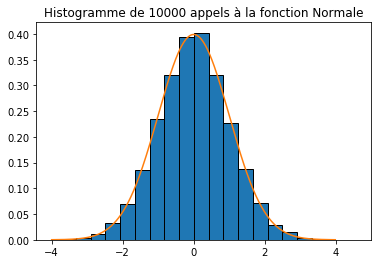

In [18]:
k=10000
plt.title('Histogramme de {} appels à la fonction Normale'.format(k))
plt.hist([Normale() for i in range(k)],bins=20,edgecolor='black',density=True)
plt.plot([i*0.01 for i in range(-400,400)],[1/sqrt(2*pi)*exp(-0.5*(i*0.01)**2) for i in range(-400,400)])
plt.show()

### Quelques exemples supplémentaires

Une variable aléatoire est dite de Cauchy si elle a pour densité $\frac{1}{\pi} \frac{1}{1+x^2}$.

Exercice: Montrer que si $U\sim \mathcal{U}(0,1)$, alors $\tan(\pi (U-\frac12))$ suit une loi de Cauchy. 

In [19]:
def Cauchy():
    return tan(pi*(rd.random()-0.5))

Traçons maintenant un histogramme de $k=10000$ appels à la fonction Normale(), et comparons-le à la densité de la loi normale.

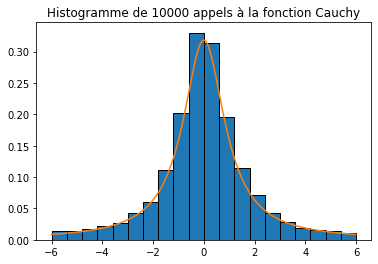

In [20]:
k=10000
plt.title('Histogramme de {} appels à la fonction Cauchy'.format(k))
plt.hist([Cauchy() for i in range(10000)],range=(-6,6),bins=20,edgecolor='black',density=True)
plt.plot([i*0.01 for i in range(-600,600)],[1/pi*1/(1+(i*0.01)**2) for i in range(-600,600)])
plt.show()

### Quelques exercices pour s'entraîner

#### Exercice
Soit $X$ une variable aléatoire de loi $\mathcal{U}(0,1)$.
1. Déterminer la densité de $Y=\cos(\pi X)$.
2. Réaliser un histogramme de 10000 appels à la fonction $\cos$(pi*random( )), et comparer avec la densité trouvée.

#### Exercice
Soient $X,Y$ deux variables aléatoires indépendantes de loi $\mathcal{U}(0,1)$.
1. Déterminer la densité de $X+Y$.
2. Réaliser un histogramme de 10000 appels à la fonction random( )+random( ), et comparer avec la densité trouvée.

#### Exercice
Soient $X,Y$ deux variables aléatoires indépendantes de loi exponentialle de paramètre $1$.
1. Déterminer la densité de $Z=XY$.
2. Réaliser un histogramme de 10000 appels à la fonction Expo(1)*Expo(1), et comparer avec la densité trouvée.